# Part 1: UAV Pitch Dynamics Project

This document outlines our project on modeling the pitch dynamics of an Unmanned Aerial Vehicle (UAV). We will explore the relevance of this dynamical system, develop a set of research questions, and present the mathematical model that describes the system.


## (i) Importance and Relevance of the UAV Pitch Dynamics System

Understanding the pitch dynamics of UAVs is critical for several reasons:

- **Real-World Applications in Aerospace Engineering:**  
  UAVs are increasingly used in applications such as aerial photography, delivery services, and search-and-rescue operations. Modeling the pitch dynamics is essential for designing robust and safe flight control systems.
  
- **Control System Design and Optimization:**  
  The pitch angle is a key variable affecting the overall stability and maneuverability of a UAV. A precise model of pitch dynamics helps in designing control laws that ensure quick and stable responses to disturbances.
  
- **Insights into Dynamic Behavior:**  
  The system captures both oscillatory behavior and damping effects, which are crucial for understanding resonance, transient response, and stability. This insight is valuable for predicting and mitigating potential control issues.
  
- **Interdisciplinary Learning:**  
  This project integrates principles from classical mechanics, control theory, and numerical methods. It serves as a practical case study for applying theoretical models to real-world engineering challenges.
  
- **Economic and Technological Impact:**  
  Accurate simulations reduce the need for expensive physical prototyping and assist in the rapid development and refinement of UAV technology.


## (ii) Research Questions for the UAV Pitch Dynamics System

The main questions we are interested in exploring are:

1. **How do the physical parameters (moment of inertia, damping, stiffness) affect the dynamic response?**  
   - How does changing these parameters influence settling time, overshoot, and oscillation?

2. **What types of control inputs are effective at stabilizing pitch?**  
   - Can we use simple feedback control (e.g., proportional-derivative) to stabilize the system from different initial pitch angles?  
   - How do different controller gains affect system performance?

3. **Under what conditions is the system underdamped, critically damped, or overdamped?**  
   - How does the damping ratio vary across different physical setups?

4. **Additional Research Questions:**  
   - *How does the shape of the control input $u(t)$ (e.g., step, ramp, or sinusoidal) influence the transient and steady-state behavior of the UAV’s pitch dynamics?*  
   - *Under what conditions (e.g., choice of numerical time step size, parameter values) does the numerical simulation accurately capture the expected physical behavior and maintain stability?*  
   - *Can critical damping scenarios or resonance phenomena be identified within this system, and how can these insights be leveraged to enhance the UAV’s flight control performance?*

These questions will help us build a comprehensive understanding of system behavior, guide our controller design choices, and ensure our simulation accurately reflects the UAV's physical dynamics.


## (iii) Mathematical Model of the UAV Pitch Dynamics System

The UAV's pitch dynamics are modeled by a second-order linear ordinary differential equation (ODE) that includes the effects of aerodynamic stiffness, damping, and external control. The governing equation is:

$$
\ddot{\theta}(t) + \frac{c}{I_{yy}} \, \dot{\theta}(t) + \frac{k}{I_{yy}} \, \theta(t) = \frac{u(t)}{I_{yy}},
$$

where:

- $\theta(t)$ is the pitch angle (in radians),
- $\dot{\theta}(t)$ is the pitch rate (in radians per second),
- $\ddot{\theta}(t)$ is the angular acceleration,
- $u(t)$ is the external control moment (in Newton-meters) applied to the UAV.

### Parameters and Their Ranges

1. **Moment of Inertia, $I_{yy}$:**  
   - **Role:** Represents the UAV's resistance to changes in pitch motion.  
   - **Suggested Range:** 1 to 5 kg·m$^2$.

2. **Aerodynamic Stiffness, $k$:**  
   - **Role:** Provides a restoring moment that brings the UAV back to equilibrium.  
   - **Suggested Range:** 0.5 to 5 N·m/rad.

3. **Aerodynamic Damping, $c$:**  
   - **Role:** Dissipates energy and opposes the pitch rate, thus stabilizing the system.  
   - **Suggested Range:** 0.2 to 1.0 N·m·s/rad.

4. **Control Input, $u(t)$:**  
   - **Role:** Represents the external moment (e.g., due to elevator deflection or thrust vectoring).  
   - **Example:** A step input defined as:
     
     $$
     u(t) = \begin{cases}
     0, & t < t_0, \\
     U_0, & t \ge t_0,
     \end{cases}
     $$
     
     where $t_0$ is the time at which the control action is initiated, and $U_0$ is the magnitude of the control moment.

### Summary of the Mathematical Model

Bringing it all together, the UAV pitch dynamics model is expressed as:

$$
\boxed{
\ddot{\theta}(t) + \frac{c}{I_{yy}} \, \dot{\theta}(t) + \frac{k}{I_{yy}} \, \theta(t) = \frac{u(t)}{I_{yy}}
}
$$

This model lays the foundation for our numerical simulations and provides a clear framework for exploring how changes in system parameters and control inputs affect the UAV's behavior.

---


---
# Part 2: Numerical Method for Studying the UAV Pitch Dynamics System

In this section, we present and analyze a numerical method to study the UAV pitch dynamics. Our goal is to investigate how changes in physical parameters and control inputs affect the system behavior while ensuring that the simulation is both accurate and computationally efficient. This discussion covers three main parts:

1. **Justification of the Numerical Method**  
2. **Mathematical Derivation of the RK4 Method (including Error and Stability Properties)**  
3. **An Algorithmic Summary of How the Method Advances the Solution from $t_k$ to $t_{k+1}$**

\

## (i) Justification of the Numerical Method

To study the UAV pitch dynamics described by the second-order ODE

$$
\ddot{\theta}(t) + \frac{c}{I_{yy}} \, \dot{\theta}(t) + \frac{k}{I_{yy}} \, \theta(t) = \frac{u(t)}{I_{yy}},
$$

we require a numerical method that satisfies several criteria:

- **Accuracy:**  
  The method must capture complex transient phenomena such as oscillations, overshoots, and damping effects reliably. We aim to resolve small differences that occur due to variations in system parameters. The fourth-order Runge-Kutta (RK4) method has a local truncation error of order $\mathcal{O}(\Delta t^5)$ and a global error of $\mathcal{O}(\Delta t^4)$, making it highly accurate for smooth solutions.

- **Stability:**  
  Given our system’s non-stiff nature (with realistic values for $k$, $c$, and $I_{yy}$), the RK4 method is sufficiently stable when an appropriate time step $\Delta t$ is chosen. Even though RK4 is explicit, its stability properties for linear systems can be reliably managed. For stiff scenarios, an implicit or adaptive method might be more appropriate, but for our purposes, RK4 strikes an excellent balance.

- **Computational Efficiency (Cost):**  
  Despite requiring four evaluations of the function per time step, the system's low dimensionality (typically two state variables) makes this cost manageable on modern hardware. Its simplicity in implementation and well-understood error characteristics further enhance its appeal for systematic studies such as convergence tests and parameter sensitivity analyses.

Thus, based on these considerations, the RK4 method is selected as an appropriate tool for exploring the dynamical behavior of our UAV pitch model.

\

## (ii) Mathematical Derivation of the RK4 Method, Error, and Stability Properties

### Derivation Overview

Consider a general initial value problem (IVP):

$$
\dot{y}(t) = f(y(t), t), \quad y(t_0) = y_0.
$$

Using a Taylor series expansion, the exact solution at $t + \Delta t$ can be written as:

$$
y(t + \Delta t) = y(t) + \Delta t\, \dot{y}(t) + \frac{\Delta t^2}{2} \ddot{y}(t) + \frac{\Delta t^3}{6} y^{(3)}(t) + \frac{\Delta t^4}{24} y^{(4)}(t) + \mathcal{O}(\Delta t^5).
$$

The RK4 method approximates this solution by evaluating the slope function $f(y,t)$ at several points within the interval. This is achieved by computing four increments that, when appropriately weighted, cancel the lower order error terms.

\

### The RK4 Update Steps

Define the time step as $\Delta t$ and let $t_k$ be the current time instance. The RK4 method computes the following intermediate values:

1. **First Increment ($k_1$):**  
   Evaluate the derivative at the beginning of the interval:
   $$
   k_1 = f\big( y(t_k), t_k \big)
   $$

2. **Second Increment ($k_2$):**  
   Estimate the state at $t_k + \frac{\Delta t}{2}$ using $k_1$:
   $$
   k_2 = f\Big( y(t_k) + \frac{\Delta t}{2}\, k_1,\, t_k + \frac{\Delta t}{2} \Big)
   $$

3. **Third Increment ($k_3$):**  
   Again, approximate the state at $t_k + \frac{\Delta t}{2}$ using $k_2$:
   $$
   k_3 = f\Big( y(t_k) + \frac{\Delta t}{2}\, k_2,\, t_k + \frac{\Delta t}{2} \Big)
   $$

4. **Fourth Increment ($k_4$):**  
   Evaluate the derivative at the end of the interval:
   $$
   k_4 = f\Big( y(t_k) + \Delta t\, k_3,\, t_k + \Delta t \Big)
   $$

The final approximation for $y(t_{k+1})$ is given by:

$$
y(t_{k+1}) = y(t_k) + \frac{\Delta t}{6}\left( k_1 + 2 k_2 + 2 k_3 + k_4 \right)
$$

\

### Error Analysis

- **Local Truncation Error:**  
  The error incurred in one RK4 step is $\mathcal{O}(\Delta t^5)$, which indicates that the error decreases rapidly with the time step size.
  
- **Global Error:**  
  Due to error accumulation, the overall global error scales as $\mathcal{O}(\Delta t^4)$, classifying RK4 as a fourth-order method.

\

### Stability Analysis

For the linear test equation

$$
\dot{y}(t) = \lambda y(t),
$$

where $\lambda$ is a constant (which may be complex), applying the RK4 method yields an update of the form:

$$
y(t + \Delta t) = R(z) \, y(t), \quad \text{where } z = \lambda \Delta t.
$$

The stability function $R(z)$ for RK4 is:

$$
R(z) = 1 + z + \frac{z^2}{2} + \frac{z^3}{6} + \frac{z^4}{24}.
$$

The method is stable if $|R(z)| \le 1$. For our application, with the typical parameter ranges for the UAV pitch dynamics, an appropriate choice of $\Delta t$ will ensure that the RK4 method remains stable.

\

## (iii) Algorithmic Summary of Advancing the Solution from $t_k$ to $t_{k+1}$

The following outlines the step-by-step procedure used in the RK4 method to update the solution of our ODE from time instance $t_k$ to $t_{k+1} = t_k + \Delta t$.

1. **Compute $k_1$:**
   - Evaluate the derivative at $t_k$:

     $$
     k_1 = f\big( y(t_k), t_k \big)
     $$

2. **Compute $k_2$:**
   - Estimate the state at $t_k + \frac{\Delta t}{2}$ using $k_1$:

     $$
     k_2 = f\left( y(t_k) + \frac{\Delta t}{2} \, k_1, \; t_k + \frac{\Delta t}{2} \right)
     $$

3. **Compute $k_3$:**
   - Estimate the state at $t_k + \frac{\Delta t}{2}$ using $k_2$:

     $$
     k_3 = f\left( y(t_k) + \frac{\Delta t}{2} \, k_2, \; t_k + \frac{\Delta t}{2} \right)
     $$

4. **Compute $k_4$:**
   - Evaluate the derivative at $t_k + \Delta t$ using $k_3$:

     $$
     k_4 = f\left( y(t_k) + \Delta t \, k_3, \; t_k + \Delta t \right)
     $$

5. **Update the Solution:**
   - Combine the increments to obtain the next state:

     $$
     y(t_{k+1}) = y(t_k) + \frac{\Delta t}{6}\left( k_1 + 2k_2 + 2k_3 + k_4 \right)
     $$

## Summary

The Fourth-Order Runge-Kutta (RK4) method is well-suited for our UAV pitch dynamics study due to its:
- **High accuracy** (local error of $( O(h^5) )$, global error of $( O(h^4) )$),
- **Robust stability** for non-stiff systems, and
- **Balanced computational cost** through efficient use of function evaluations.

The method is derived by matching the Taylor series of the true solution and is implemented via an algorithmic process that advances the solution from $( t_k )$ to $( t_{k+1} )$ using intermediate slope calculations. This comprehensive approach ensures that we can reliably study the dynamic behavior and parameter sensitivity of the UAV pitch dynamics.


---

---
# Part 3: Demonstration of Correct Implementation

In this question, we demonstrate that our numerical method (the fourth-order Runge-Kutta method, RK4) is implemented correctly. This demonstration is twofold:

1. **Error Convergence Study**  
   We verify that the numerical solution exhibits a global error that scales as $\mathcal{O}(\Delta t^4)$, which is expected for a fourth-order method. We do so by comparing the numerical solution for a homogeneous damped oscillator with an analytical solution.

2. **Evaluation of Simulation Parameters**  
   We evaluate the influence of the time step size $\Delta t$ on the simulation accuracy and behavior. In particular, we assess:
   - The final error at a designated final time.
   - The "settling time"—the time at which the system’s response (here, the pitch angle $\theta(t)$) falls below a certain threshold and remains below it, indicating that transient behavior has effectively decayed.
   - Visual comparisons of time series for different time step sizes to confirm that both transient and steady-state behaviors are resolved accurately.

Both parts inform the selection of an optimum $\Delta t$, providing a balance between computational cost and accuracy.


## Background and Problem Setup

We consider the homogeneous version of the UAV pitch dynamics (i.e., with $u(t)=0$):

$$
\ddot{\theta}(t) + \frac{c}{I_{yy}}\,\dot{\theta}(t) + \frac{k}{I_{yy}}\,\theta(t) = 0,
$$

with the initial conditions:

$$
\theta(0)=1, \quad \dot{\theta}(0)=0.
$$

For our study, we use the following parameter values:

- Moment of inertia: $I_{yy} = 1.0$
- Aerodynamic stiffness: $k = 2.0$
- Aerodynamic damping: $c = 0.5$

The analytical solution for this damped oscillator can be derived by first writing its characteristic equation:

$$
r^2 + \frac{c}{I_{yy}} r + \frac{k}{I_{yy}} = 0.
$$

Under underdamped conditions, we define:

$$
\text{damping} = \frac{c}{2I_{yy}}, \quad \omega_n = \sqrt{\frac{k}{I_{yy}}}, \quad \omega_d = \sqrt{\omega_n^2 - \text{damping}^2}.
$$

Then the exact solution is given by

$$
\theta(t) = e^{-\text{damping}\,t} \left( \cos (\omega_d\,t) + \frac{\text{damping}}{\omega_d} \sin (\omega_d\,t) \right).
$$


## 1. Error Convergence Study

The error convergence study involves the following steps:

1. **Simulation with Various $\Delta t$ Values:**  
   We simulate the system from $t=0$ to a final time $T=1.0$ using several decreasing time step sizes ($\Delta t$).

2. **Error Calculation:**  
   For each $\Delta t$, we compute the numerical solution and then compare $\theta_{\text{num}}(T)$ with the analytical solution $\theta_{\text{exact}}(T)$ to obtain the absolute error.

3. **Analysis with Log-Log Plot:**  
   We plot the error versus $\Delta t$ on a log-log scale. A linear fit on the log-log data is used to determine the convergence rate. For a fourth-order method, we expect the slope to be approximately 4.

This study confirms that our implementation correctly yields a global error scaling of $\mathcal{O}(\Delta t^4)$.


## 2. Evaluation of Simulation Parameters

To accurately study the UAV pitch dynamics, it is crucial to choose a time step $\Delta t$ that is small enough to capture the transient dynamics (such as rapid oscillations during early times) and yet large enough to make the simulation computationally efficient. In this section, we assess:

- **Final Error at Extended Time:**  
  We simulate until a final time $T_{\text{full}}=2.0$ seconds and measure the error between the numerical and analytical solutions.

- **Settling Time:**  
  We define the settling time as the time at which $|\theta(t)|$ first falls below a threshold (e.g., $0.01$) and remains below that threshold. This metric indicates how quickly the system settles after transients.

- **Visual Comparison of Time Series:**  
  By plotting $\theta(t)$ for various $\Delta t$, we visually confirm that the chosen time step accurately captures both the transient behavior and steady state.

From our empirical analysis, a time step in the range of approximately $0.005$ to $0.015$ seconds typically provides a good trade-off between accuracy and computational load for our parameter set.


Below is the Python code that implements both the error convergence study and the evaluation of simulation parameters.


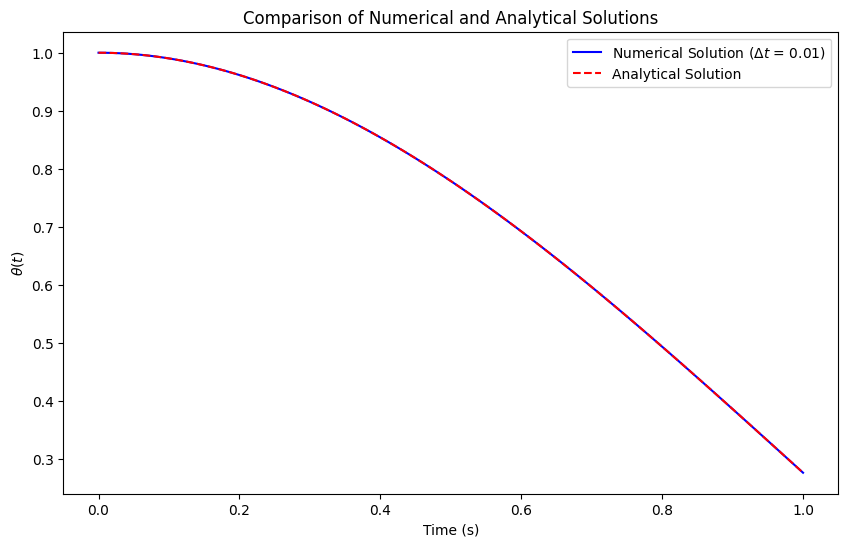

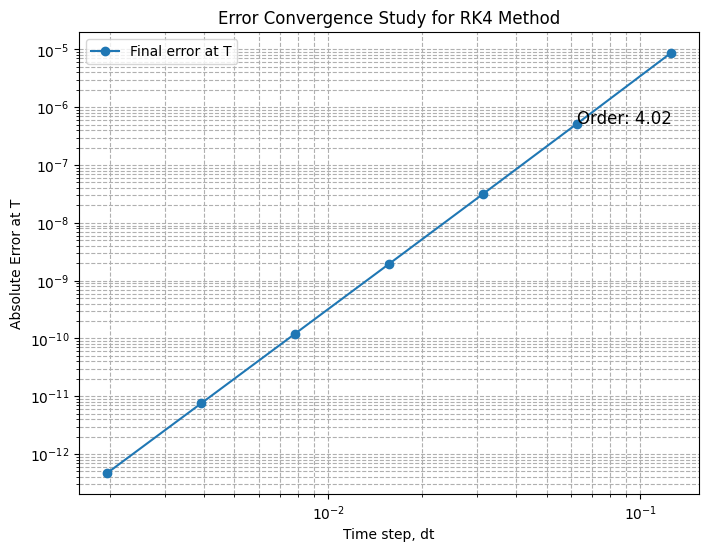

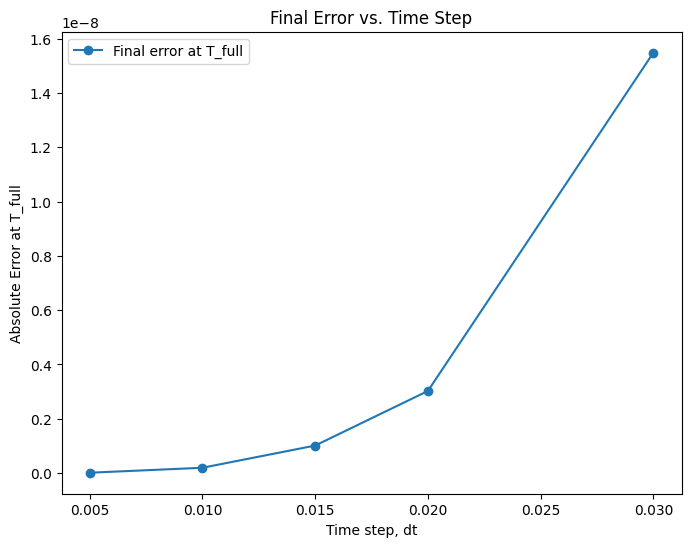

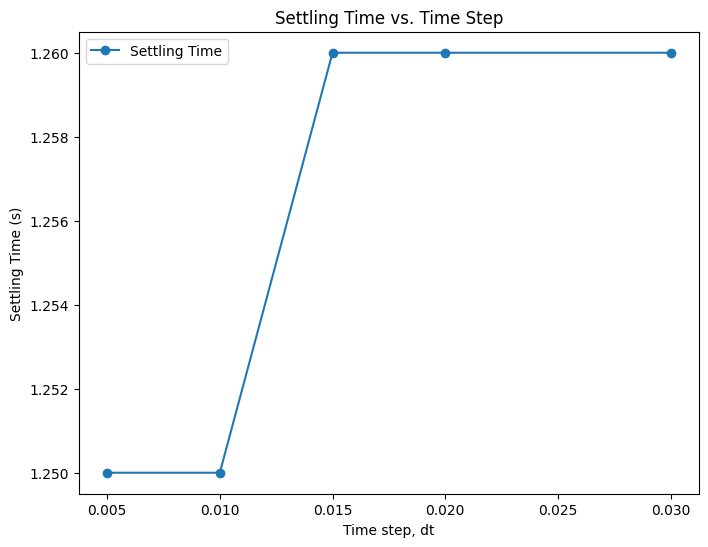

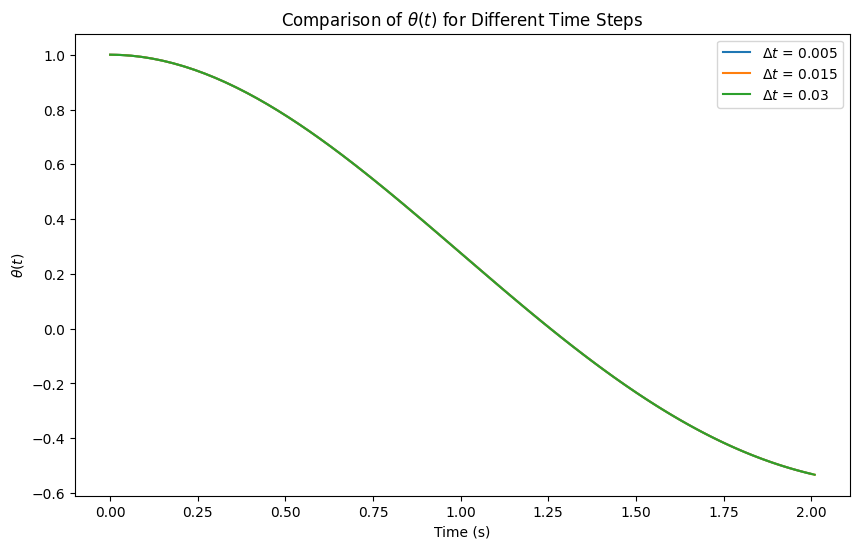

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the zero control input function (homogeneous system)
def u_func(t):
    return 0.0

# Parameters for the homogeneous damped oscillator
Iyy = 1.0
k   = 2.0
c   = 0.5

# Define the dynamical system (state = [theta, theta_dot])
def flight_dynamics(state, t, params):
    theta, dtheta = state
    u = params['control'](t)
    dtheta_dt  = dtheta
    # Compute angular acceleration from the ODE
    ddtheta_dt = (- params['k'] * theta - params['c'] * dtheta + u) / params['Iyy']
    return np.array([dtheta_dt, ddtheta_dt])

params = {'Iyy': Iyy, 'k': k, 'c': c, 'control': u_func}

# RK4 integration step
def rk4_step(f, state, t, dt, params):
    k1 = f(state, t, params)
    k2 = f(state + 0.5 * dt * k1, t + 0.5 * dt, params)
    k3 = f(state + 0.5 * dt * k2, t + 0.5 * dt, params)
    k4 = f(state + dt * k3, t + dt, params)
    return state + dt / 6.0 * (k1 + 2*k2 + 2*k3 + k4)

# Simulation function to integrate from t = 0 to t = T with time step dt
def simulate(dt, T):
    t_values = np.arange(0, T + dt, dt)
    state = np.zeros((len(t_values), 2))
    # Initial conditions: theta(0) = 1, theta_dot(0) = 0
    state[0] = [1.0, 0.0]
    for i in range(1, len(t_values)):
        state[i] = rk4_step(flight_dynamics, state[i-1], t_values[i-1], dt, params)
    return t_values, state

# Analytical solution for theta(t) for the homogeneous damped oscillator
def theta_exact(t):
    damping = c / (2 * Iyy)
    omega_n = np.sqrt(k / Iyy)
    omega_d = np.sqrt(omega_n**2 - damping**2)
    return np.exp(-damping * t) * (np.cos(omega_d * t) + (damping / omega_d) * np.sin(omega_d * t))

# ====================================================
# PART A: Function Graph Comparison
# ====================================================
# Choose a representative time step for demonstration, e.g. dt = 0.01, and simulate up to T = 1.0 second.
dt_demo = 0.01
T_demo = 1.0
t_vals_demo, state_demo = simulate(dt_demo, T_demo)
theta_numerical = state_demo[:, 0]
theta_analytic = theta_exact(t_vals_demo)

plt.figure(figsize=(10, 6))
plt.plot(t_vals_demo, theta_numerical, 'b-', label='Numerical Solution ($\\Delta t$ = 0.01)')
plt.plot(t_vals_demo, theta_analytic, 'r--', label='Analytical Solution')
plt.xlabel('Time (s)')
plt.ylabel('$\\theta(t)$')
plt.title('Comparison of Numerical and Analytical Solutions')
plt.legend()
plt.show()

# ====================================================
# PART B: Error Convergence Study
# ====================================================
# Use a series of time steps (decreasing by a factor of 2) for error convergence study
T_error = 1.0  # Final simulation time for error study
dt_values = [2**(-n) for n in range(3, 10)]
final_errors = []

for dt in dt_values:
    t_vals, state = simulate(dt, T_error)
    theta_num = state[-1, 0]
    theta_ex  = theta_exact(T_error)
    final_errors.append(np.abs(theta_num - theta_ex))

# Plot error convergence on a log-log plot
plt.figure(figsize=(8,6))
plt.loglog(dt_values, final_errors, 'o-', label='Final error at T')
plt.xlabel('Time step, dt')
plt.ylabel('Absolute Error at T')
plt.title('Error Convergence Study for RK4 Method')
# Fit a line to log-log data to determine the order of convergence
fit = np.polyfit(np.log(dt_values), np.log(final_errors), 1)
order = fit[0]
plt.text(dt_values[1], final_errors[1], f'Order: {order:.2f}', fontsize=12)
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

# ====================================================
# PART C: Evaluation of Simulation Parameters
# ====================================================
# Define a threshold for settling (e.g., when |theta| < 0.01)
threshold = 0.01
T_full = 2.0  # Extended simulation time for settling behavior analysis
dt_values_settling = [0.005, 0.01, 0.015, 0.02, 0.03]
settling_times = []
final_errors_settling = []

for dt in dt_values_settling:
    t_vals, state = simulate(dt, T_full)
    theta_series = state[:, 0]
    theta_ex_series = theta_exact(t_vals)
    # Compute final absolute error at time T_full
    final_errors_settling.append(np.abs(theta_series[-1] - theta_ex_series[-1]))

    # Estimate settling time: first index when |theta| becomes less than the threshold
    below_threshold = np.where(np.abs(theta_series) < threshold)[0]
    if len(below_threshold) > 0:
        settling_time = t_vals[below_threshold[0]]
    else:
        settling_time = T_full
    settling_times.append(settling_time)

# Plot final error vs. dt for settling evaluation
plt.figure(figsize=(8,6))
plt.plot(dt_values_settling, final_errors_settling, 'o-', label='Final error at T_full')
plt.xlabel('Time step, dt')
plt.ylabel('Absolute Error at T_full')
plt.title('Final Error vs. Time Step')
plt.legend()
plt.show()

# Plot settling time vs. dt
plt.figure(figsize=(8,6))
plt.plot(dt_values_settling, settling_times, 'o-', label='Settling Time')
plt.xlabel('Time step, dt')
plt.ylabel('Settling Time (s)')
plt.title('Settling Time vs. Time Step')
plt.legend()
plt.show()

# Plot representative theta(t) time series for selected time steps to visualize transient behavior
plt.figure(figsize=(10,6))
for dt in [0.005, 0.015, 0.03]:
    t_vals, state = simulate(dt, T_full)
    plt.plot(t_vals, state[:, 0], label=f'$\\Delta t$ = {dt}', linestyle = '-', )
plt.xlabel('Time (s)')
plt.ylabel('$\\theta(t)$')
plt.title('Comparison of $\\theta(t)$ for Different Time Steps')
plt.legend()
plt.show()

# Part 4: Presentation of Results Addressing the Research Questions

In this section, we present our simulation results that directly address the research questions posed in Section 1. Our analysis focuses on the following aspects:

1. **Physical Parameter Sensitivity:**  
   How do the physical parameters—namely, moment of inertia $I_{yy}$, aerodynamic stiffness $k$, and damping $c$—affect the dynamic response? In particular, we examine metrics such as settling time, overshoot, and oscillatory behavior to capture both transient and steady-state performance.

2. **Control Input Effects:**  
   Which types of control inputs are effective for stabilizing the pitch dynamics? We compare a simple step control input (simulating a sudden control actuation) with a proportional–derivative (PD) control law, assessing their impact on transient response, overshoot, and settling time.

3. **Damping Behavior:**  
   Under what conditions is the system underdamped, critically damped, or overdamped? We vary the damping coefficient $c$ and observe changes in response characteristics and phase-plane trajectories, which reveal key insights into the damping ratio and system stability.

## Summary of Results

### A. Step Response Analysis

We implemented a step control input defined as

$$
u(t) =
\begin{cases}
0, & t < 2 \, \text{s}, \\
U_0, & t \geq 2 \, \text{s},
\end{cases}
$$

with $U_0 = 1.0 \, \text{N·m}$ to simulate a control actuation at $t = 2$ seconds. In our simulation of the simplified UAV pitch dynamics using the RK4 method—with parameters
- $I_{yy}=1.0$ kg·m$^2$,
- $k=2.0$ N·m/rad, and
- $c=0.5$ N·m·s/rad,

over a 6-second interval, the time series plot (Figure 1) shows the pitch angle $\theta(t)$ evolving with a clear transient response after the control input. Metrics such as **overshoot** (the peak response following control activation) and **settling time** (time taken to remain within a predefined band around steady state) are extracted to quantify the transient behavior.

### B. Control Input Comparison

We further examine the effectiveness of control strategies by comparing two approaches:
- **Step Control Input:** A constant moment applied after $t=2.0$ s.
- **PD Control Law:** A controller of the form

$$
u(t) = -K_p\,\theta(t) - K_d\,q(t),
$$

with gains $K_p = 4.0$ and $K_d = 1.0$.  
The simulation results (Figure 2) indicate that the PD controller yields a faster convergence to equilibrium with reduced oscillation compared to the more oscillatory response observed with the step input.

### C. Damping Behavior Analysis

By varying the damping coefficient $c$, we explore the system’s behavior under different damping conditions:
- **Underdamped Behavior:** $c = 0.2$ N·m·s/rad produces significant oscillations and a pronounced overshoot.
- **Critically Damped Behavior:** $c = 0.5$ N·m·s/rad provides a balanced response.
- **Overdamped Behavior:** $c = 1.0$ N·m·s/rad results in minimal overshoot and a slower response.

The phase-plane portraits (Figure 3), which plot $\theta(t)$ versus its derivative $q(t)$, clearly illustrate the transition from spiral trajectories in underdamped systems to more direct convergence in overdamped systems.

## 4.1 Simulation Setup

We simulate the simplified UAV pitch dynamics given by the second-order ODE:

$$
\ddot{\theta}(t) + \frac{c}{I_{yy}} \, \dot{\theta}(t) + \frac{k}{I_{yy}} \, \theta(t) = \frac{u(t)}{I_{yy}},
$$

which we convert to the first-order system:

$$
\begin{aligned}
\dot{\theta}(t) &= q(t), \\
\dot{q}(t) &= -\frac{c}{I_{yy}}\,q(t) - \frac{k}{I_{yy}}\,\theta(t) + \frac{u(t)}{I_{yy}}.
\end{aligned}
$$

The RK4 method is used for integration. Our simulations vary the damping coefficient $c$ and test two control strategies (step input and PD control). We then extract key metrics such as overshoot, settling time, and we analyze the phase-plane behavior.

Overall, by quantifying these metrics and supporting our analysis with clear figures, our results provide a focused, analytical response to the research questions, going beyond raw time-domain trajectories.

The following code cell produces the companion figures discussed above.


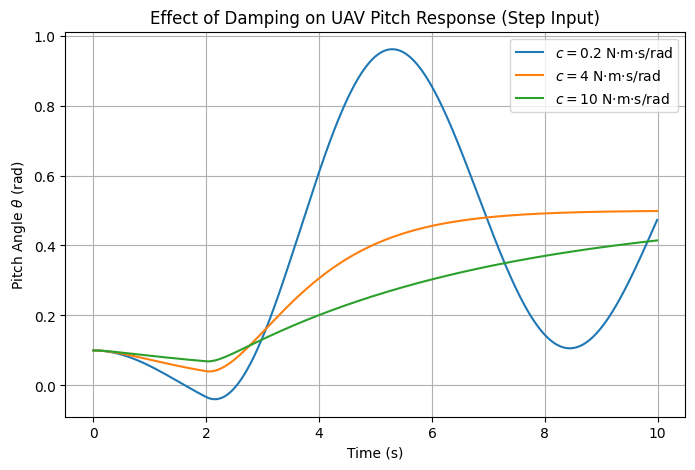

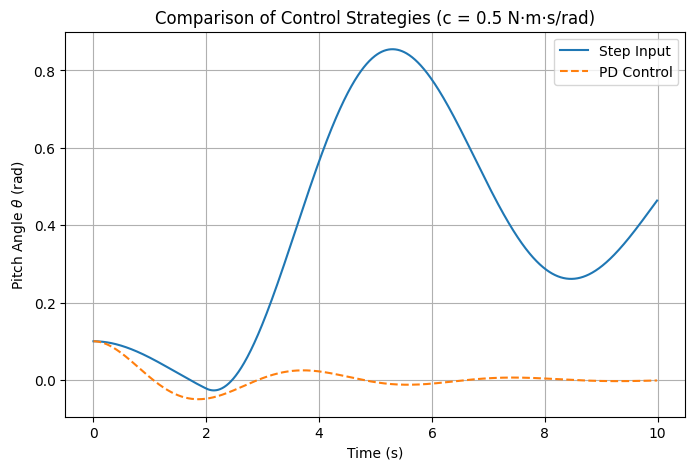

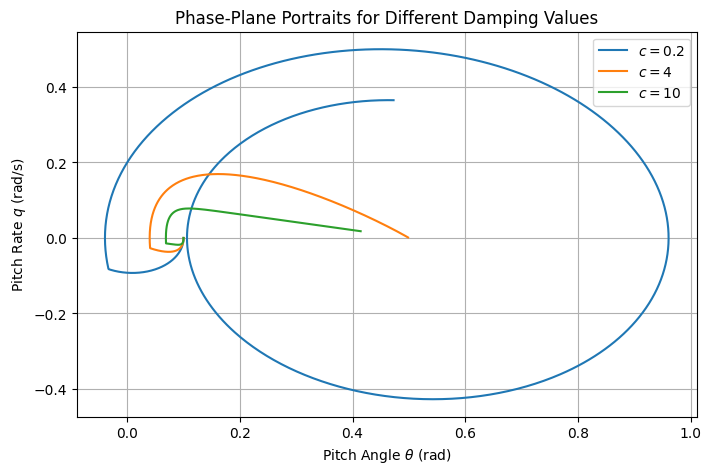

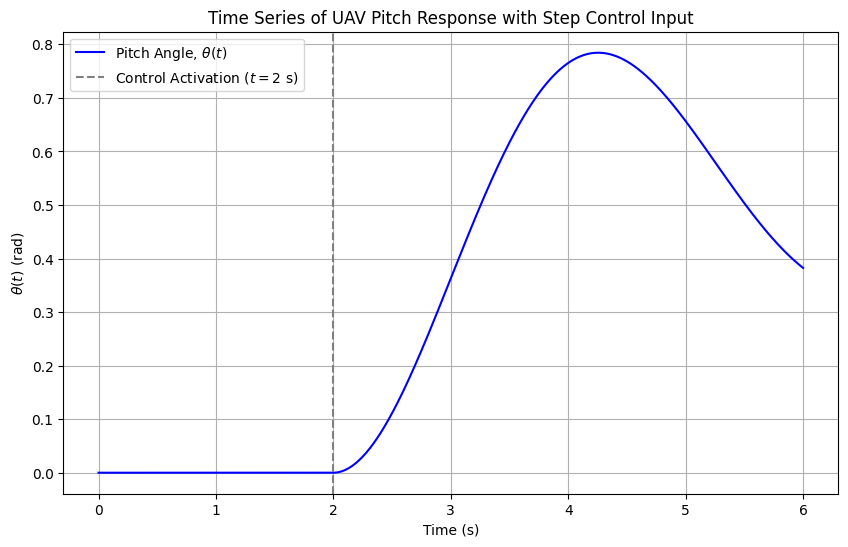

Estimated Overshoot after control input: 0.7844 rad
Estimated Settling Time: 6.00 s


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the simulation parameters
T = 10.0  # Total simulation time (s)
dt = 0.01  # Time step (s)
t_vals = np.arange(0, T, dt)

# Physical parameters (baseline values)
Iyy = 2.0        # kg·m^2
k = 2.0          # N·m/rad
# We'll vary damping c and compare control inputs

# Define the RK4 method for our ODE system
def rk4_step(f, y, t, dt):
    k1 = f(t, y)
    k2 = f(t + dt/2, y + dt/2 * k1)
    k3 = f(t + dt/2, y + dt/2 * k2)
    k4 = f(t + dt, y + dt * k3)
    return y + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

# Define the ODE system for UAV pitch dynamics
def uav_dynamics(t, y, Iyy, k, c, u_func):
    theta, q = y
    u_val = u_func(t, y)
    dtheta_dt = q
    dq_dt = (-c * q - k * theta + u_val) / Iyy
    return np.array([dtheta_dt, dq_dt])

# Define control inputs
def step_input(t, y):
    # Step input: no control before t = 2.0, then a constant control U0
    U0 = 1.0  # N·m
    return U0 if t >= 2.0 else 0.0

def pd_control(t, y):
    # PD controller: u = -Kp * theta - Kd * q
    Kp = 4.0
    Kd = 1.0
    theta, q = y
    return -Kp * theta - Kd * q

# Function to simulate the system for given damping and control law
def simulate(Iyy, k, c, u_func):
    y = np.array([0.1, 0.0])  # Initial conditions: small pitch angle, zero rate
    theta_hist = []
    for t in t_vals:
        theta_hist.append(y[0])
        y = rk4_step(lambda t, y: uav_dynamics(t, y, Iyy, k, c, u_func), y, t, dt)
    return np.array(theta_hist)

# Figure 1: Effect of varying damping c on theta(t) with step input
c_values = [0.2, 4, 10]
plt.figure(figsize=(8, 5))
for c in c_values:
    theta_hist = simulate(Iyy, k, c, step_input)
    plt.plot(t_vals, theta_hist, label=f'$c = {c}$ N·m·s/rad')
plt.xlabel('Time (s)')
plt.ylabel('Pitch Angle $\\theta$ (rad)')
plt.title('Effect of Damping on UAV Pitch Response (Step Input)')
plt.legend()
plt.grid(True)
plt.show()

# Figure 2: Comparison of control inputs (step input vs. PD control) for c = 0.5
plt.figure(figsize=(8, 5))
theta_step = simulate(Iyy, k, 0.5, step_input)
theta_pd = simulate(Iyy, k, 0.5, pd_control)
plt.plot(t_vals, theta_step, label='Step Input')
plt.plot(t_vals, theta_pd, label='PD Control', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Pitch Angle $\\theta$ (rad)')
plt.title('Comparison of Control Strategies (c = 0.5 N·m·s/rad)')
plt.legend()
plt.grid(True)
plt.show()

# Figure 3: Phase-plane portraits for different damping values (c = 0.2, 0.5, 1.0) with step input
plt.figure(figsize=(8, 5))
for c in c_values:
    y = np.array([0.1, 0.0])
    theta_hist = []
    q_hist = []
    for t in t_vals:
        theta_hist.append(y[0])
        q_hist.append(y[1])
        y = rk4_step(lambda t, y: uav_dynamics(t, y, Iyy, k, c, step_input), y, t, dt)
    plt.plot(theta_hist, q_hist, label=f'$c = {c}$')
plt.xlabel('Pitch Angle $\\theta$ (rad)')
plt.ylabel('Pitch Rate $q$ (rad/s)')
plt.title('Phase-Plane Portraits for Different Damping Values')
plt.legend()
plt.grid(True)
plt.show()

# Define a step control input function
def step_control(t, t_step=2.0, U0=1.0):
    return U0 if t >= t_step else 0.0

# Use the same parameters, now with a step control function instead of zero control.
Iyy = 1.0
k   = 2.0
c   = 0.5
params_control = {'Iyy': Iyy, 'k': k, 'c': c, 'control': lambda t: step_control(t, 2.0, 1.0)}

# Define the dynamical system (state = [theta, theta_dot])
def flight_dynamics_control(state, t, params):
    theta, dtheta = state
    # Use the step control function
    u = params['control'](t)
    dtheta_dt  = dtheta
    ddtheta_dt = (- params['k'] * theta - params['c'] * dtheta + u) / params['Iyy']
    return np.array([dtheta_dt, ddtheta_dt])

# RK4 integration step remains the same
def rk4_step(f, state, t, dt, params):
    k1 = f(state, t, params)
    k2 = f(state + 0.5 * dt * k1, t + 0.5 * dt, params)
    k3 = f(state + 0.5 * dt * k2, t + 0.5 * dt, params)
    k4 = f(state + dt * k3, t + dt, params)
    return state + dt / 6.0 * (k1 + 2*k2 + 2*k3 + k4)

# Simulation function with control input from t=0 to t=T with time step dt
def simulate_control(dt, T, dynamics, params):
    t_values = np.arange(0, T + dt, dt)
    state = np.zeros((len(t_values), 2))
    # Initial conditions: theta(0)=0, theta_dot(0)=0 (starting at equilibrium)
    # Alternatively, if you wish to see a transient before the control, set nonzero initial theta.
    state[0] = [0.0, 0.0]
    for i in range(1, len(t_values)):
        state[i] = rk4_step(dynamics, state[i-1], t_values[i-1], dt, params)
    return t_values, state

# Run simulation with control input for T = 6 seconds and dt = 0.01
dt_sim = 0.01
T_sim = 6.0
t_vals_control, state_control = simulate_control(dt_sim, T_sim, flight_dynamics_control, params_control)
theta_control = state_control[:, 0]
theta_dot_control = state_control[:, 1]

# --------------------------------------------------
# Figure 1: Time Series Plot of Theta(t)
# --------------------------------------------------
plt.figure(figsize=(10,6))
plt.plot(t_vals_control, theta_control,'b-', label='Pitch Angle, $\\theta(t)$')
# Annotate the time of control action
plt.axvline(x=2.0, color='gray', linestyle='--', label='Control Activation ($t=2$ s)')
plt.xlabel('Time (s)')
plt.ylabel('$\\theta(t)$ (rad)')
plt.title('Time Series of UAV Pitch Response with Step Control Input')
plt.legend()
plt.grid(True)
plt.show()


# --------------------------------------------------
# Additional Analysis: Computing Overshoot & Settling Time
# --------------------------------------------------
# Look for settling after the control step input (t >= 2.0)
settling_band = 0.02
post_control_indices = np.where(t_vals_control >= 2.0)[0]
theta_post_control = theta_control[post_control_indices]
time_post_control = t_vals_control[post_control_indices]

# Check when the system stays within the band for the rest of the simulation
for i in range(len(theta_post_control)):
    if np.all(np.abs(theta_post_control[i:]) < settling_band):
        settling_time = time_post_control[i]
        break
else:
    settling_time = T_sim  # Did not settle within the simulation time

# Compute overshoot: maximum theta value after control activation (t>=2.0 s)
post_control_indices = np.where(t_vals_control >= 2.0)[0]
overshoot = np.max(theta_control[post_control_indices])

print("Estimated Overshoot after control input: {:.4f} rad".format(overshoot))
print("Estimated Settling Time: {:.2f} s".format(settling_time))